## Evaluation models
- Carreguem les dades formatejades en un dataframe. 
- Utilitzem els models per fer entrenaments i prediccions. 
- Fem una predicció sobre les dades de 2024 i ho pugem a kaggle. 


#### Carreguem les dades

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("../full_dataframe.csv")

In [6]:
data = data.rename(columns={"Unnamed: 0": "index"})
data.head()

,index,station_id,year,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,percentage_docks_available,date
0,0,1.0,2020.0,1.0,1.0,2.0,0.522727,0.503788,0.469697,0.403409,0.354167,2020/1/1/2
1,1,1.0,2020.0,1.0,1.0,7.0,0.289773,0.373106,0.304924,0.238636,0.240530,2020/1/1/7
2,2,1.0,2020.0,1.0,1.0,12.0,0.253788,0.268939,0.350379,0.344697,0.393939,2020/1/1/12
3,3,1.0,2020.0,1.0,1.0,17.0,0.390152,0.346591,0.255814,0.220930,0.186047,2020/1/1/17
4,4,1.0,2020.0,1.0,1.0,22.0,0.083333,0.218992,0.437984,0.515504,0.470930,2020/1/1/22


In [14]:
# Definim una llista amb les columnes que ens interessen
features = []
for i in data.columns:
    features.append(i)

features.remove('index')
features.remove('date')

In [15]:
# Separem en train i test, entrenem i fem algunes prediccions

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[features], data["percentage_docks_available"], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [16]:
# fem servir les funcions a utils per evaluar la qualitat dels resultats

from utils import evaluate_models
results = evaluate_models(y_test, predictions)
print(results)

{'Mean Squared Error': 2.7244806123141425e-31, 'Mean Absolute Error': 4.2028028778760345e-16, 'R2 Score': 1.0}


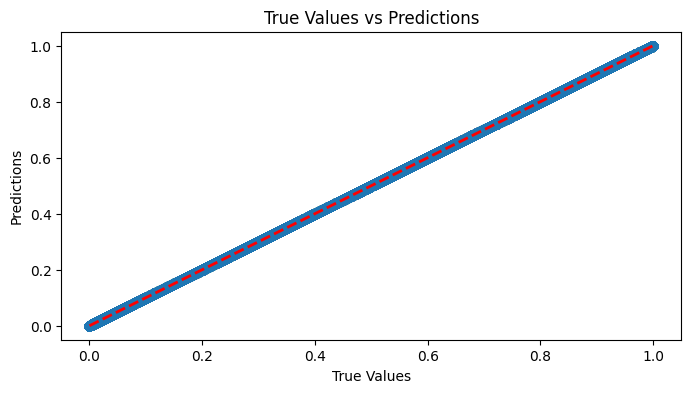

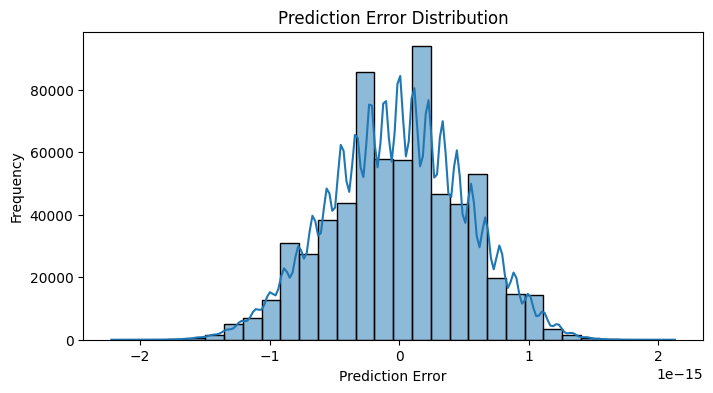

In [17]:
from utils import plot_model_evaluation
plot_model_evaluation(y_test, predictions)

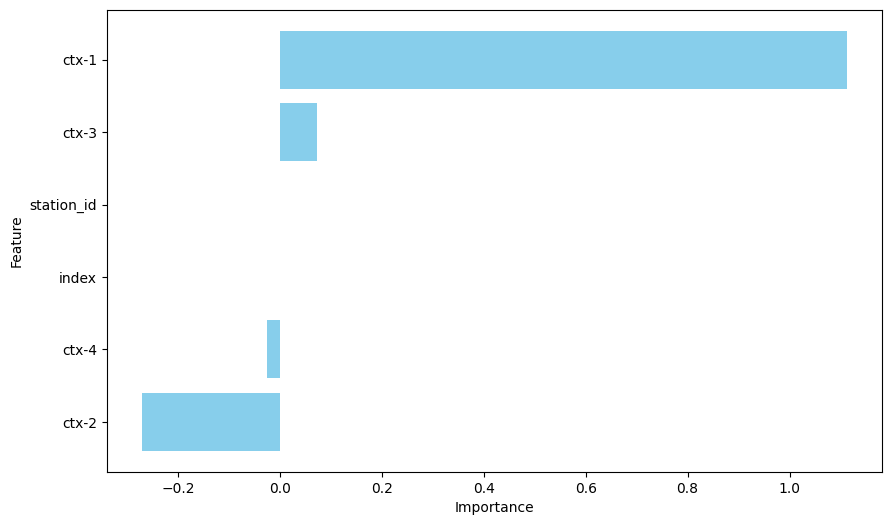

In [8]:
from utils import plot_linear_model_feature_importance
plot_linear_model_feature_importance(model.coef_, features)

In [8]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
y_pred_labels = [1 if p > threshold else 0 for p in predictions]
y_test_labels = [1 if p > threshold else 0 for p in y_test.values]

# Now use y_pred_labels (containing class labels) for the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
print(cm)

[[184793  32272]
 [ 22606 420836]]


In [9]:
# Probablement l'haureu d'instal·lar
from xgboost import XGBRegressor


model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.012233172334614874


In [ ]:
pip install xgboost

In [ ]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
y_pred_labels = [1 if p > threshold else 0 for p in predictions]
y_test_labels = [1 if p > threshold else 0 for p in y_test.values]

# Now use y_pred_labels (containing class labels) for the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
print(cm)

In [ ]:
pip install seaborn

In [ ]:
# PRINCIPAL COMPONENT ANALYSIS
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# afegim variable target
pca_df['percentage_docks_available'] = data['percentage_docks_available']

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='percentage_docks_available', data=pca_df, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.colorbar(label='Percentage Docks Available')
plt.show()